#Text Analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer


In [91]:
anime = pd.read_csv('anime.csv')

In [31]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


#Sentiment Analysis

In [92]:
# Define a function to categorize the ratings
def categorize_rating(rating):
    if rating >= 8:
        return 'positive'
    elif rating >= 5:
        return 'neutral'
    else:
        return 'negative'

# Apply the categorization function to the 'rating' column
anime['sentiment'] = anime['rating'].apply(categorize_rating)


In [48]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members,sentiment
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,positive
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,positive
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,positive
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,positive
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,positive


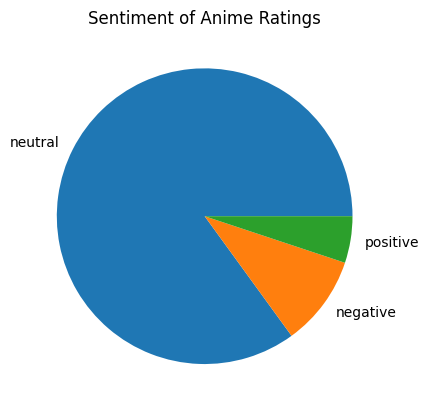

In [93]:
# Calculate the proportion of each sentiment category
sentiment_counts = anime['sentiment'].value_counts(normalize=True)

# Plot a pie chart of the sentiment counts
plt.pie(sentiment_counts.values, labels=sentiment_counts.index)
plt.title('Sentiment of Anime Ratings')
plt.show()


In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

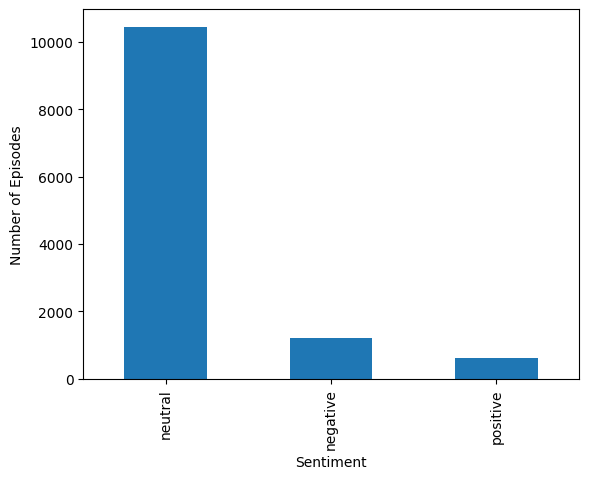

In [102]:
from textblob import TextBlob

# Define a function to get the polarity of each rating
def get_polarity(rating):
    return TextBlob(str(rating)).sentiment.polarity


# Plot a bar chart of the number of episodes for each sentiment
anime['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Number of Episodes')
plt.show()


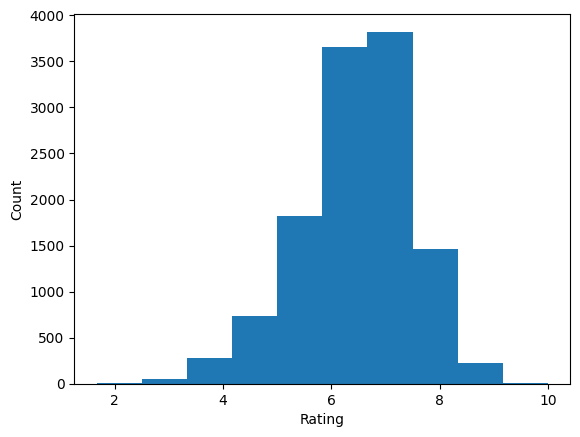

In [94]:
plt.hist(anime['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#Text Classification

In [95]:
# Convert the episodes column to numeric, replacing non-numeric values with NaN
anime['episodes'] = pd.to_numeric(anime['episodes'], errors='coerce')

# Replace the NaN values with the mean of the column
mean = anime['episodes'].mean()
anime['episodes'].fillna(mean, inplace=True)

Short         9148
Long          1665
Medium        1322
Extra Long     151
Name: episode_length, dtype: int64


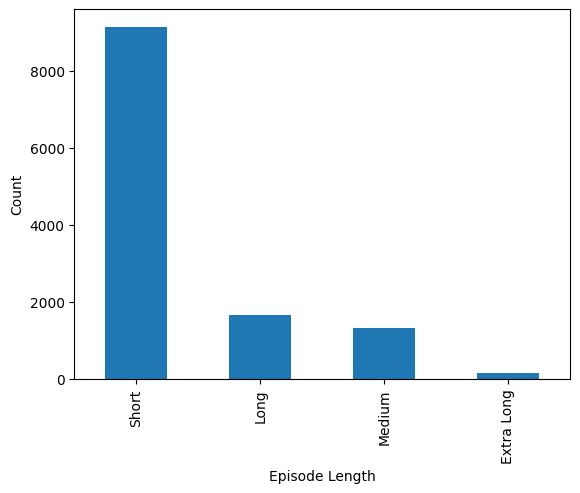

In [96]:
# Define the bin edges and labels
bins = [0, 12, 24, 100, 1000]
labels = ['Short', 'Medium', 'Long', 'Extra Long']

# Create a new column with the text labels for each bin
anime['episode_length'] = pd.cut(anime['episodes'], bins=bins, labels=labels)

# Print the number of episodes in each bin
print(anime['episode_length'].value_counts())

# Plot a bar chart of the number of anime in each episode length category
anime['episode_length'].value_counts().plot(kind='bar')
plt.xlabel('Episode Length')
plt.ylabel('Count')
plt.show()


In [81]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

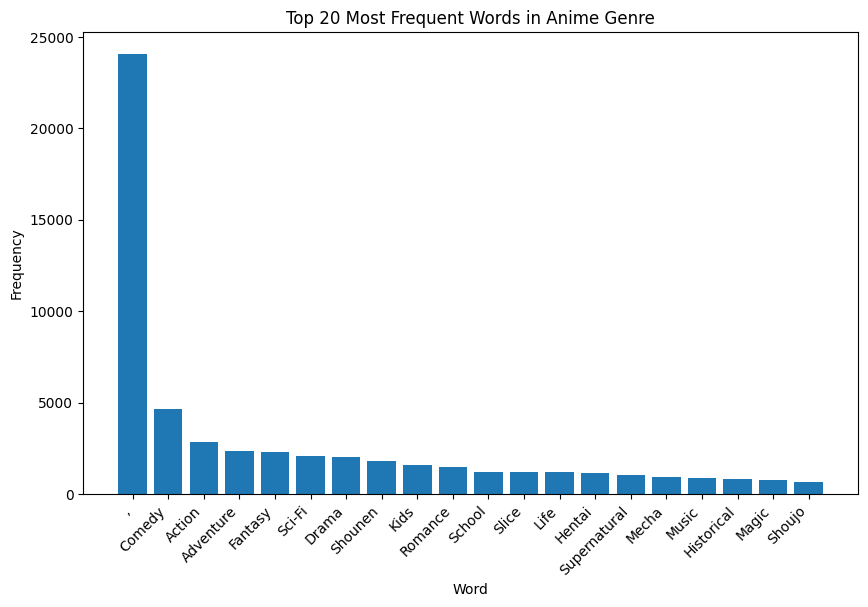

In [100]:
from nltk.corpus import stopwords
from collections import Counter

# Tokenize the genre strings using the NLTK library
genre_tokens = anime['genre'].apply(lambda x: nltk.word_tokenize(str(x)))


# Remove stop words
stop_words = set(stopwords.words('english'))
genre_tokens = genre_tokens.apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Count the frequency of each word
genre_words = [word for tokens in genre_tokens for word in tokens]
genre_word_freq = Counter(genre_words)

# Visualize the top 20 most frequent words using a bar chart
top_genre_words = genre_word_freq.most_common(20)
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar([word[0] for word in top_genre_words], [word[1] for word in top_genre_words])
ax.set_title('Top 20 Most Frequent Words in Anime Genre')
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


In [103]:
anime

,anime_id,name,genre,type,episodes,rating,members,sentiment,episode_length
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,positive,Short
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,positive,Long
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,positive,Long
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,positive,Medium
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,positive,Long
...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1.0,4.15,211,negative,Short
12290,5543,Under World,Hentai,OVA,1.0,4.28,183,negative,Short
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.0,4.88,219,negative,Short
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1.0,4.98,175,negative,Short


#Topic Modelling


In [106]:
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

# Replace NaN values in the genre column with an empty string
anime['genre'] = anime['genre'].fillna('')

# Tokenize the genres into words
anime['genre_tokens'] = anime['genre'].apply(lambda x: simple_preprocess(str(x)))

# Create a dictionary from the tokenized genres
genre_dict = Dictionary(anime['genre_tokens'])

# Filter out words that appear in less than 10% or more than 90% of the documents
genre_dict.filter_extremes(no_below=0.1, no_above=0.9)

# Convert the tokenized genres to bag-of-words vectors using the dictionary
corpus = [genre_dict.doc2bow(genre_tokens) for genre_tokens in anime['genre_tokens']]

# Train the LDA model with 5 topics
lda_model = LdaModel(corpus=corpus, id2word=genre_dict, num_topics=5)


In [107]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.216*"fi" + 0.216*"sci" + 0.138*"action" + 0.091*"mecha" + 0.055*"adventure" + 0.045*"comedy" + 0.040*"space" + 0.037*"shounen" + 0.025*"military" + 0.020*"fantasy"
Topic: 1 
Words: 0.194*"drama" + 0.121*"comedy" + 0.119*"historical" + 0.082*"romance" + 0.067*"parody" + 0.053*"dementia" + 0.035*"yaoi" + 0.035*"seinen" + 0.034*"action" + 0.031*"school"
Topic: 2 
Words: 0.139*"slice" + 0.139*"life" + 0.139*"of" + 0.107*"comedy" + 0.098*"school" + 0.064*"sports" + 0.041*"action" + 0.037*"shounen" + 0.032*"arts" + 0.032*"martial"
Topic: 3 
Words: 0.598*"hentai" + 0.064*"music" + 0.034*"comedy" + 0.034*"action" + 0.029*"romance" + 0.027*"yuri" + 0.026*"demons" + 0.023*"super" + 0.023*"power" + 0.021*"supernatural"
Topic: 4 
Words: 0.217*"kids" + 0.195*"comedy" + 0.163*"fantasy" + 0.117*"adventure" + 0.045*"action" + 0.044*"horror" + 0.036*"supernatural" + 0.027*"shounen" + 0.022*"magic" + 0.017*"historical"


Topic 0: Action and Sci-Fi anime

Topic 1: Drama and Romance anime

Topic 2: Slice of Life and School anime

Topic 3: Hentai and Supernatural anime

Topic 4: Kids and Fantasy anime

#Keyword extraction

In [115]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [145]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Tokenize the anime names into words
anime['name_tokens'] = anime['name'].apply(lambda x: simple_preprocess(x))

# Train a Word2Vec model on the tokenized anime names
model = Word2Vec(anime['name_tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Get the word vector for a specific anime name

vector = model.wv['naruto'.strip()]
print(vector)

[-0.03064328  0.02845074  0.00484807  0.02114325 -0.0077971  -0.08190344
  0.00791226  0.12559834 -0.01572239 -0.0456729  -0.00178913 -0.0769842
 -0.00978399  0.044172   -0.00703767 -0.04004119  0.0303778  -0.04711142
  0.00444774 -0.0730019   0.01451974  0.01468215  0.02780189 -0.02043924
 -0.01546354 -0.0106464  -0.03357492  0.0249195  -0.04305665  0.0009629
  0.05789095  0.00194004  0.03552386 -0.03275055 -0.02591256  0.05510652
  0.02150677 -0.04642083 -0.00912783 -0.07510343  0.01893143 -0.05420455
 -0.0324202   0.00378172  0.03065691 -0.02821676 -0.03686615  0.01168427
  0.01285864  0.0510571   0.02233723 -0.02427104 -0.03070973 -0.00355461
 -0.0216144  -0.0076283   0.01838196 -0.01768863 -0.03536346 -0.00556084
 -0.00145237  0.0094973  -0.01458959  0.01570928 -0.05937609  0.07527056
  0.03048351  0.03128454 -0.06439884  0.06461345 -0.00571557  0.0304634
  0.04360405 -0.01291408  0.04752785  0.02485329  0.02197043  0.02195879
 -0.02458276  0.01441267 -0.03491408  0.01362651  0.01

In [135]:
similar_words = model.wv.most_similar('naruto')
print(similar_words)


[('de', 0.9801507592201233), ('specials', 0.9800518751144409), ('na', 0.9796915650367737), ('wo', 0.9793373346328735), ('quot', 0.9792667627334595), ('monogatari', 0.9791154265403748), ('of', 0.9791113138198853), ('ni', 0.9790870547294617), ('no', 0.9790157079696655), ('wa', 0.9787400960922241)]


In [151]:
similar_anime = model.wv.most_similar([vector], topn=10)
similar_anime_names = [anime_name for anime_name, _ in similar_anime]
print(similar_anime_names)

['naruto', 'de', 'specials', 'na', 'wo', 'no', 'ni', 'quot', 'of', 'wa']


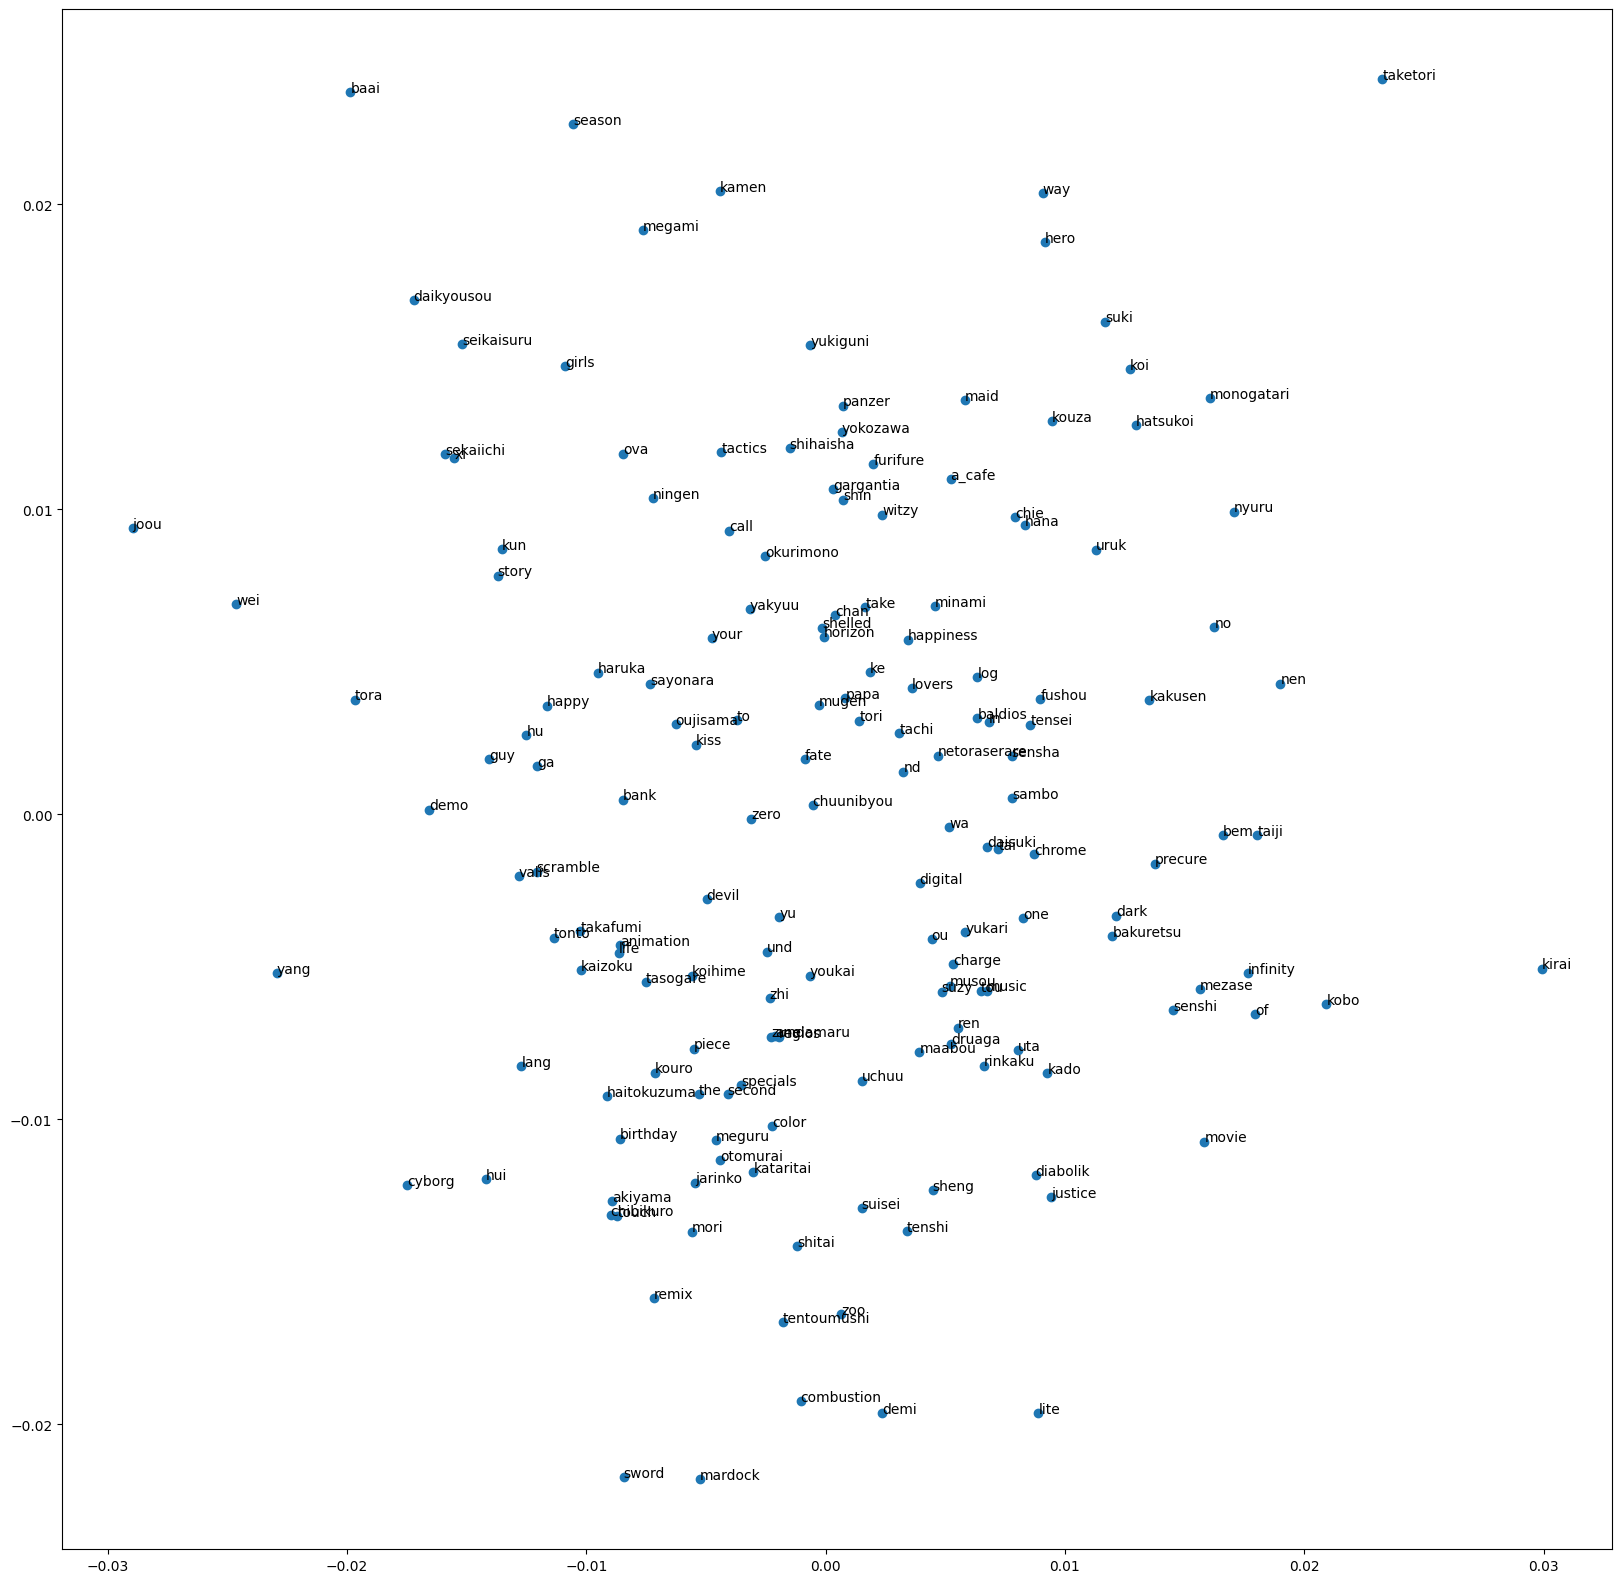

In [144]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select a subset of anime names
anime_subset = anime.sample(50, random_state=42)

# Tokenize the anime names into words
anime_subset['name_tokens'] = anime_subset['name'].apply(lambda x: simple_preprocess(x))

# Train a Word2Vec model on the tokenized anime names
model = Word2Vec(anime_subset['name_tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Reduce the dimensionality of the word vectors to 2D using PCA
pca = PCA(n_components=2)
X = model.wv[model.wv.index_to_key]
result = pca.fit_transform(X)

# Plot the word vectors in 2D space
plt.figure(figsize=(20, 20))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(model.wv.index_to_key):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


This plot shows the relative positions of the anime names in a 2D space based on their word embeddings (word vector representations) learned by the Word2Vec model. Each point represents an anime name, and the distance between points indicates the similarity between the corresponding anime names based on the words used to describe them. In other words, anime names that are semantically similar (e.g., they share similar themes or genres) are expected to be located close to each other in this space.





